# Projeto Semantix

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import streamlit

sns.set_theme()

%reload_ext watermark
%watermark -iv -v

import warnings

warnings.filterwarnings("ignore")

Python implementation: CPython
Python version       : 3.12.1
IPython version      : 8.21.0

matplotlib: 3.8.3
streamlit : 1.31.1
pandas    : 2.2.0
seaborn   : 0.13.2
numpy     : 1.26.4



In [2]:
def analise(data, y):
    analise = pd.DataFrame({'dtype': data.dtypes,
                            'contagem': data.count(),
                            'missing': data.isna().sum(),
                            'nunique': data.nunique(),
                            'papel': 'covariavel'})
    analise.loc[analise.index == y, 'papel'] = 'resposta'
    return analise

In [17]:
df = pd.read_csv('./Dados/matches.csv', index_col=0, parse_dates=['Date'])
df.drop(columns='Notes', inplace=True)
df

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Referee,Match Report,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,...,Anthony Taylor,Match Report,13.0,1.0,17.8,0.0,0,0,2024,Liverpool
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,...,Thomas Bramall,Match Report,25.0,9.0,16.8,1.0,0,1,2024,Liverpool
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,...,John Brooks,Match Report,9.0,4.0,17.2,1.0,0,0,2024,Liverpool
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,...,Simon Hooper,Match Report,17.0,4.0,14.7,0.0,0,0,2024,Liverpool
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,...,Michael Oliver,Match Report,16.0,5.0,15.8,0.0,0,0,2024,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,2023-12-30,15:00,Premier League,Matchweek 20,Sat,Away,L,0.0,2.0,Manchester City,...,David Coote,Match Report,4.0,2.0,14.9,0.0,0,0,2024,SheffieldUnited
22,2024-01-21,14:00,Premier League,Matchweek 21,Sun,Home,D,2.0,2.0,West Ham,...,Michael Salisbury,Match Report,20.0,5.0,18.5,1.0,1,1,2024,SheffieldUnited
24,2024-01-30,20:00,Premier League,Matchweek 22,Tue,Away,L,2.0,3.0,Crystal Palace,...,Tony Harrington,Match Report,9.0,5.0,16.5,0.0,0,0,2024,SheffieldUnited
25,2024-02-03,17:30,Premier League,Matchweek 23,Sat,Home,L,0.0,5.0,Aston Villa,...,Paul Tierney,Match Report,10.0,4.0,10.0,0.0,0,0,2024,SheffieldUnited


In [12]:
analise(df, 'Result')

,dtype,contagem,missing,nunique,papel
Date,object,476,0,75,covariavel
Time,object,476,0,11,covariavel
Comp,object,476,0,1,covariavel
Round,object,476,0,24,covariavel
Day,object,476,0,7,covariavel
Venue,object,476,0,2,covariavel
Result,object,476,0,3,resposta
GF,float64,476,0,8,covariavel
GA,float64,476,0,8,covariavel
Opponent,object,476,0,20,covariavel


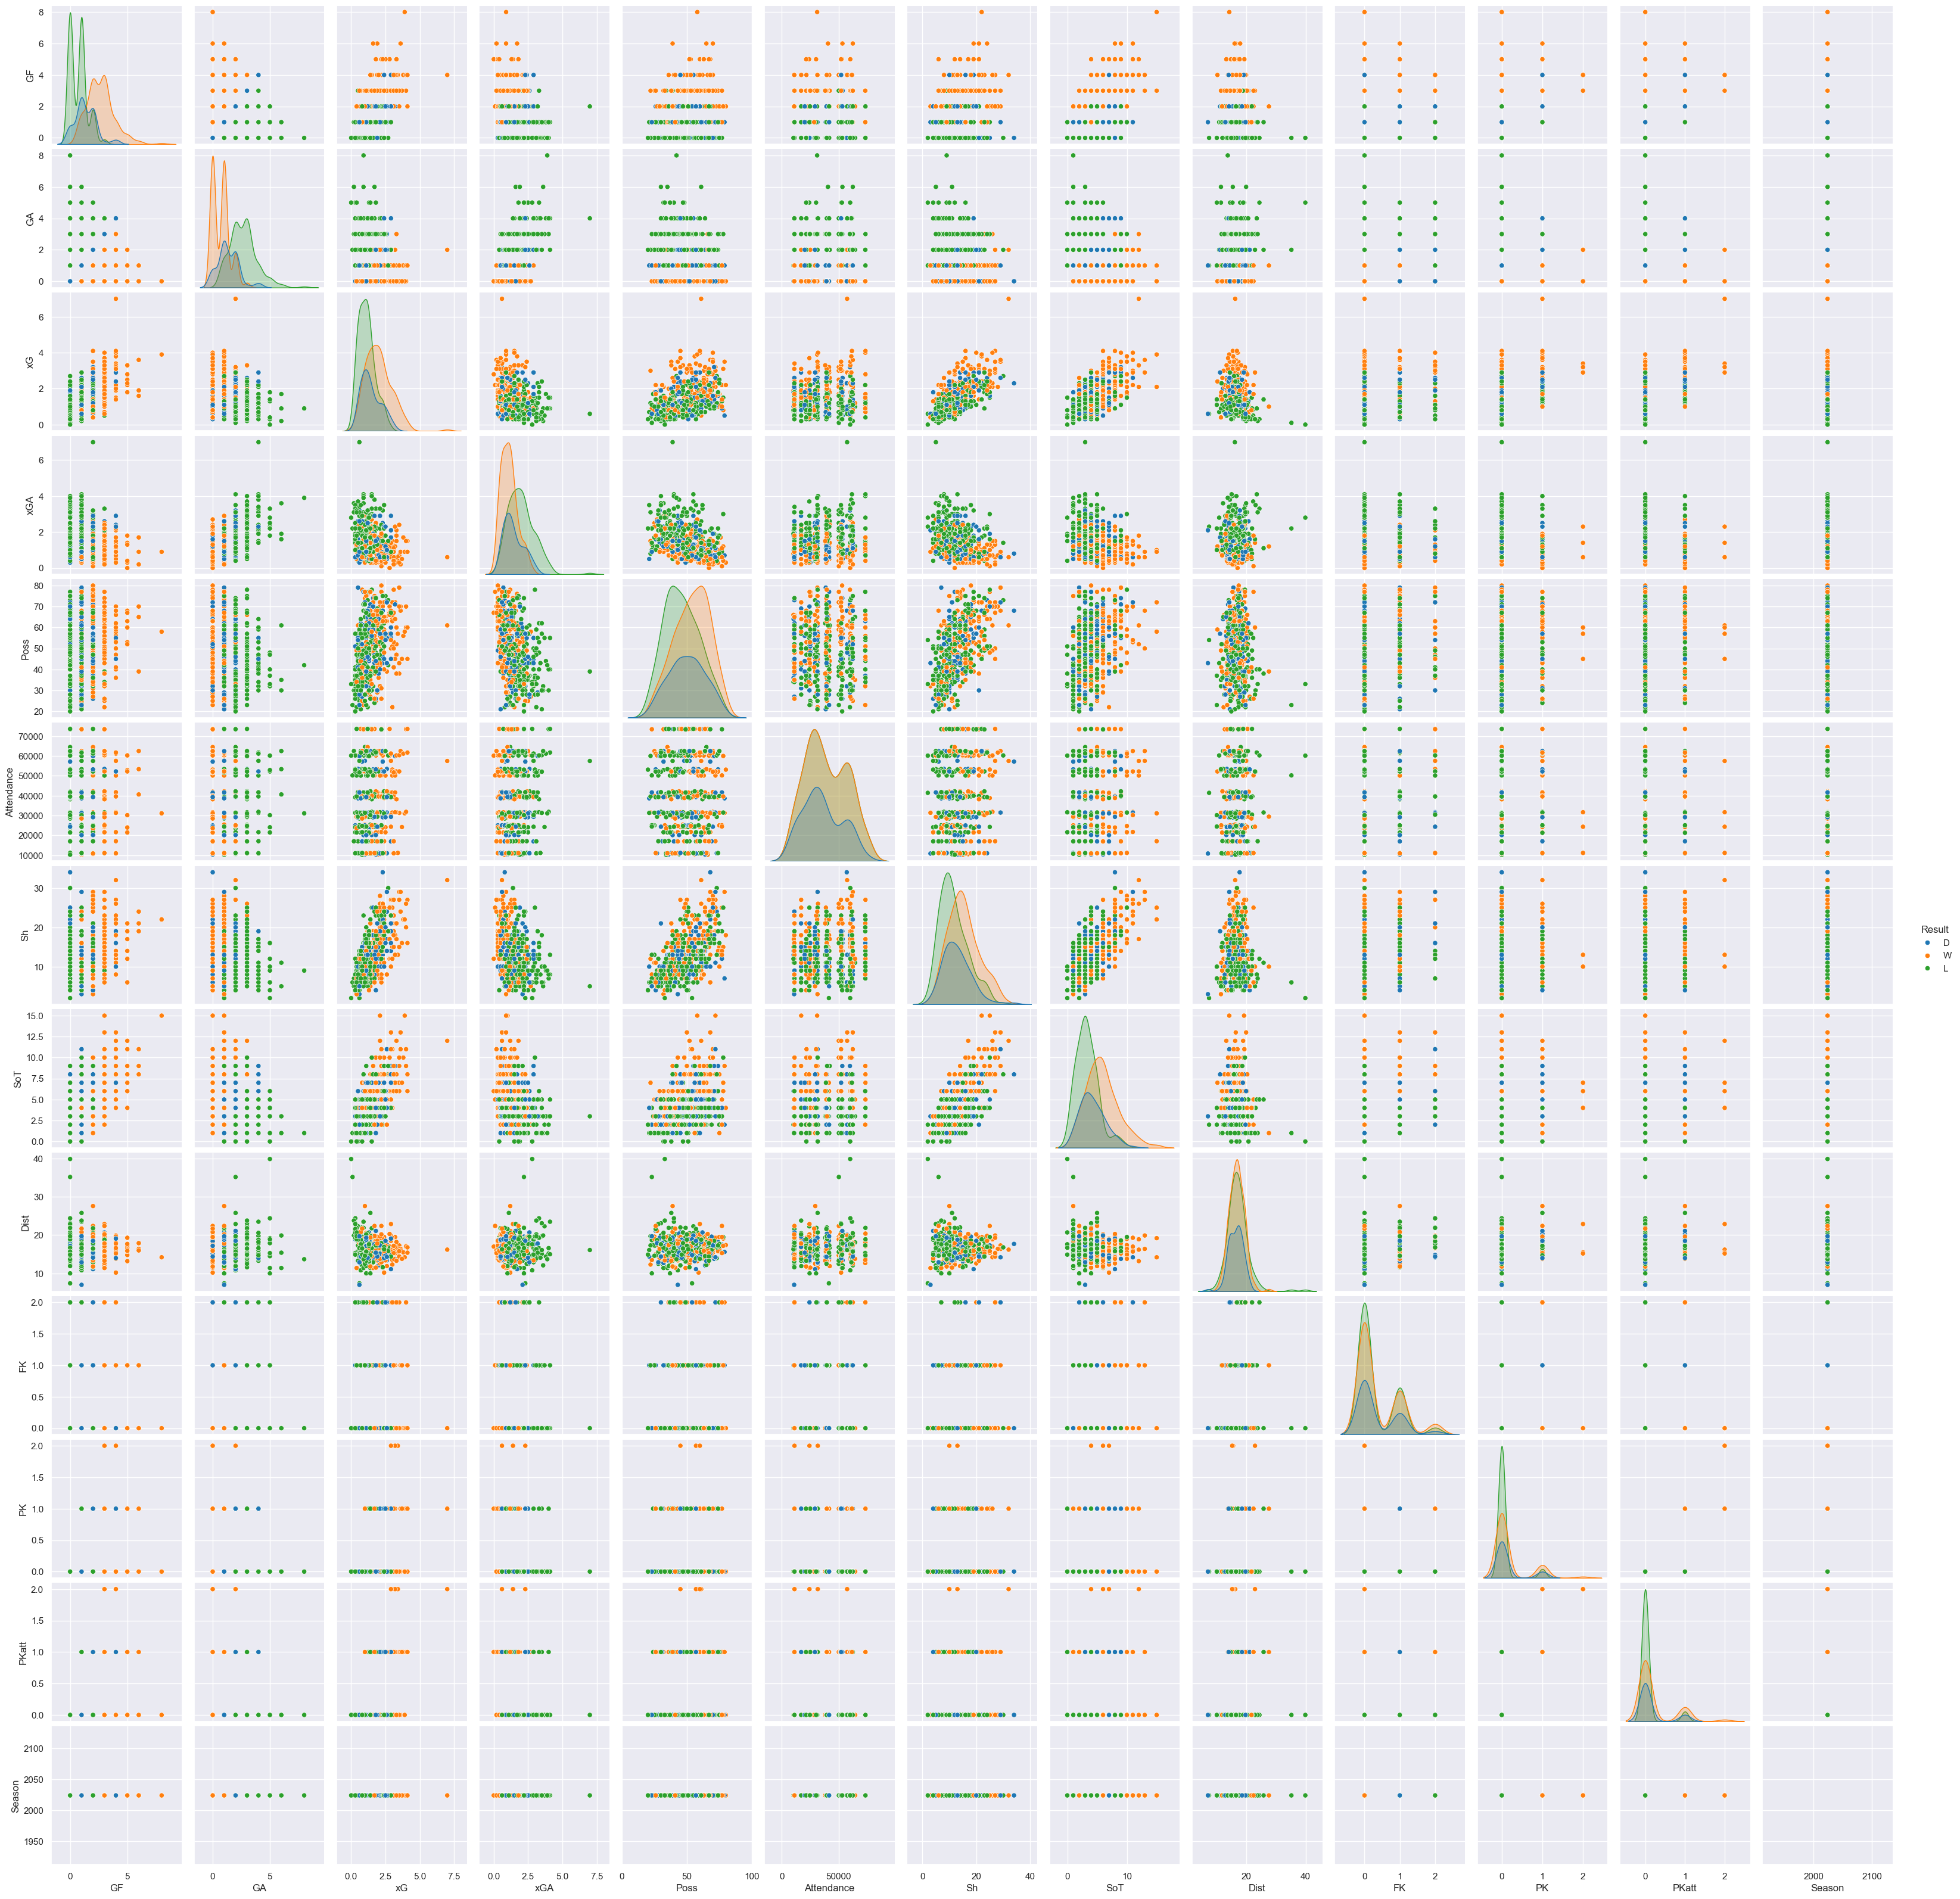

In [13]:
sns.pairplot(data=df, hue='Result', palette="tab10")

In [ ]:
df_tratado = df.drop(columns=['CNPJ emit.', 'No.', 'Emitente', 'Data Emissão', 'Data Registro', 'Situação do Crédito'])
metadados = analise(data=df_tratado,y='flag_credito')
metadados

In [8]:
df.iloc[:,0:20].sort_values(by='Date', ascending=False)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Sh
238,32,2024-02-12,20:00,Premier League,Matchweek 24,Mon,Away,W,3.0,1.0,Crystal Palace,1.4,0.6,77.0,25110.0,Ben Chilwell,4-2-3-1,Michael Oliver,Match Report,14.0
356,27,2024-02-12,20:00,Premier League,Matchweek 24,Mon,Home,L,1.0,3.0,Chelsea,0.6,1.4,23.0,25110.0,Joachim Andersen,4-1-4-1,Michael Oliver,Match Report,13.0
70,33,2024-02-11,14:00,Premier League,Matchweek 24,Sun,Away,W,6.0,0.0,West Ham,3.6,0.2,70.0,62475.0,Martin Ødegaard,4-3-3,Craig Pawson,Match Report,24.0
118,35,2024-02-11,16:30,Premier League,Matchweek 24,Sun,Home,L,1.0,2.0,Manchester Utd,2.4,1.8,56.0,42185.0,John McGinn,4-2-3-1,Robert Jones,Match Report,23.0
142,33,2024-02-11,16:30,Premier League,Matchweek 24,Sun,Away,W,2.0,1.0,Aston Villa,1.8,2.4,44.0,42185.0,Bruno Fernandes,4-2-3-1,Robert Jones,Match Report,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,2023-08-12,17:30,Premier League,Matchweek 1,Sat,Home,W,5.0,1.0,Aston Villa,3.3,1.8,52.0,52207.0,Kieran Trippier,4-3-3,Andy Madley,Match Report,17.0
95,0,2023-08-12,17:30,Premier League,Matchweek 1,Sat,Away,L,1.0,5.0,Newcastle Utd,1.8,3.3,48.0,52207.0,John McGinn,4-2-3-1,Andy Madley,Match Report,16.0
404,0,2023-08-12,15:00,Premier League,Matchweek 1,Sat,Home,L,0.0,1.0,Fulham,2.7,1.5,42.0,39940.0,James Tarkowski,4-4-1-1,Stuart Attwell,Match Report,19.0
428,0,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Home,L,0.0,3.0,Manchester City,0.3,1.9,35.0,21572.0,Josh Cullen,5-4-1,Craig Pawson,Match Report,6.0
